# Dataset
Penjelasan Label
* 0: sms normal
* 1: fraud atau penipuan
* 2: promo

## Laod Data

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/klasifikasi-spam-sms-master/data/dataset_sms_spam_v1.csv')
data.head()

,teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


## Preview Data

Total Jumlah SMS: 1143 data

terdiri dari (label):
-- [0] SMS Normal	: 569 data
-- [1] Fraud / Penipuan	: 335 data
-- [2] Promo		: 239 data



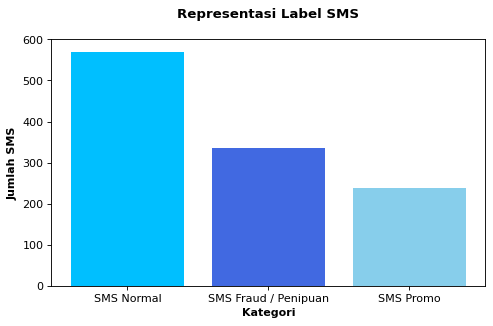

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os # Import the os module

%matplotlib inline

print('Total Jumlah SMS:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] SMS Normal\t:', data[data.label == 0].shape[0], 'data')
print('-- [1] Fraud / Penipuan\t:', data[data.label == 1].shape[0], 'data')
print('-- [2] Promo\t\t:', data[data.label == 2].shape[0], 'data\n')

height = data['label'].value_counts()
labels = ('SMS Normal', 'SMS Fraud / Penipuan', 'SMS Promo')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('Representasi Label SMS\n', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah SMS', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)

# Create the 'img' directory if it doesn't exist
os.makedirs('img', exist_ok=True)

plt.savefig('img/representasi label.png') # save

# Preprocessing
## Case Folding

In [6]:
import re

def casefolding(text):
    text = text.lower() # merubah bentuk menjadi lower case
    text = re.sub(r'https?://\S+|www\. \S+', '', text) # menghapus angka
    text = re.sub(r'[-+]?[0-9]+', '', text)
    text = re.sub(r'[^\w\s]','',text) # menghapus karakter tanda baca
    text = text.strip()
    return text

In [7]:
# membandingkan sebelum dan sesudah case folding
raw_sample = data['teks'].iloc[2]
case_folding = casefolding(raw_sample)

print('Raw data\t : ',raw_sample)
print('Case Folding\t : ', case_folding)

Raw data	 :  2016-07-08 11:47:11.Plg Yth, sisa kuota Flash Anda 478KB. Download MyTelkomsel apps di http://tsel.me/tsel utk cek kuota&beli paket Flash atau hub *363#
Case Folding	 :  plg yth sisa kuota flash anda kb download mytelkomsel apps di  utk cek kuotabeli paket flash atau hub


# Normalisasi

In [8]:
key_norm = pd.read_csv('/content/drive/My Drive/Colab Notebooks/klasifikasi-spam-sms-master/data/key_norm.csv')

def text_normalize(text):
    text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
    text = str.lower(text)
    return text

In [9]:
# membandingkan sebelum dan sesudah normalisasi
raw_data = data['teks'].iloc[696]
word_normal = text_normalize(case_folding)

print('Raw data\t : ',raw_data)
print('Normalisasi\t : ', word_normal)

Raw data	 :  Btw magicomnya yg sedang Gais, gaada yg gede
Normalisasi	 :  pulang yang terhormat sisa kuota flash anda kb download mytelkomsel apps di untuk cek kuotabeli paket flash atau hubungi


## Filtering (Stopword Removal)

In [10]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# Mengunduh dataset 'stopwords'
nltk.download('stopwords')
stopwords_ind = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
len(stopwords_ind)

758

In [12]:
# melihat daftar stopword dari nltk
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [13]:
# membuat fungsi stopword removal

#menambahkan kata dala stopword
more_stopword = ['tsel', 'gb', 'rb', 'btw']
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)



In [14]:
# membandingkan sebelum dan sesudah case folding
raw_sample = data['teks'].iloc[696]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t : ',raw_data)
print('Case Folding\t : ', case_folding)
print('Stopword Removal \t\t', stopword_removal)

Raw data	 :  Btw magicomnya yg sedang Gais, gaada yg gede
Case Folding	 :  btw magicomnya yg sedang gais gaada yg gede
Stopword Removal 		 magicomnya yg gais gaada yg gede


## Stemming


## Stemming

In [15]:
!pip -q install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 13.0 MB/s eta 0:00:00


In [16]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    text = stemmer.stem(text)
    return text

In [17]:
raw_sample = data['teks'].iloc[696]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t : ',raw_data)
print('Case Folding\t : ', case_folding)
print('Stopword Removal \t\t:', stopword_removal)
print('Stemming \t\t :', text_stemming)

Raw data	 :  Btw magicomnya yg sedang Gais, gaada yg gede
Case Folding	 :  btw magicomnya yg sedang gais gaada yg gede
Stopword Removal 		: magicomnya yg gais gaada yg gede
Stemming 		 : magicomnya yg gais gaada yg gede


# Text Preprocessing Pipeline

In [18]:
# membuat fungsi untuk meggabungkan seluruh langkah text prepocesing
def text_prepocessing_process(text):
    text = casefolding(text)
    text = text_normalize(text)
    text = remove_stop_words(text)
    text = stemming(text)
    return text

In [19]:
%%time
data['clean_teks']= data['teks'].apply(text_prepocessing_process)

CPU times: user 5min 58s, sys: 996 ms, total: 5min 59s
Wall time: 6min 2s


In [20]:
data

,teks,label,clean_teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,promo beli paket flash my telkomsel app extra ...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,rupiah ribu spesial pilih aktif promo sd novem...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,pulang hormat sisa kuota flash kb download myt...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,pulang hormat sisa kuota flash kb download myt...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,rupiah ribu spesial pilih aktif buru skb
...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0,yooo oke umumin grup kelas
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0,nulis kerudung kirain warna jins
1140,Mba mau kirim 300 ya,0,mbak kirim ya
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0,nama beaok bwrangkat pagimau cas atay tranfer


In [21]:
data.to_csv('/content/drive/My Drive/Colab Notebooks/klasifikasi-spam-sms-master/data/clean_data.csv')

print("Pembersihan Data telah berhasil dilakukan dan disimpan clean_data.csv")

Pembersihan Data telah berhasil dilakukan dan disimpan clean_data.csv


## Feature Engineering

In [22]:
# pisahkan kolom feature dan target
x =  data['clean_teks']
y =  data['label']

In [23]:
x

,clean_teks
0,promo beli paket flash my telkomsel app extra ...
1,rupiah ribu spesial pilih aktif promo sd novem...
2,pulang hormat sisa kuota flash kb download myt...
3,pulang hormat sisa kuota flash kb download myt...
4,rupiah ribu spesial pilih aktif buru skb
...,...
1138,yooo oke umumin grup kelas
1139,nulis kerudung kirain warna jins
1140,mbak kirim ya
1141,nama beaok bwrangkat pagimau cas atay tranfer


In [24]:
y

,label
0,2
1,2
2,2
3,2
4,2
...,...
1138,0
1139,0
1140,0
1141,0


## Feature Extraction (TF-IDF dan N-Gram)

In [25]:
# save model
import pickle
import os

#TF - IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Unigram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(x)

x_tf_idf = vec_TF_IDF.transform(x)

pickle.dump(vec_TF_IDF.vocabulary_,open("feature_TF_IDF.sav", "wb"))

In [26]:
print(os.getcwd())

/content


In [27]:
vec_TF_IDF.vocabulary_

{'promo': 2313,
 'beli': 323,
 'paket': 2106,
 'flash': 871,
 'my': 1898,
 'telkomsel': 2893,
 'app': 162,
 'extra': 842,
 'kuota': 1567,
 'lte': 1670,
 'telpon': 2896,
 'mnthr': 1849,
 'buru': 480,
 'cek': 521,
 'tselmemytsel': 3031,
 'sk': 2709,
 'rupiah': 2521,
 'ribu': 2470,
 'spesial': 2768,
 'pilih': 2193,
 'aktif': 66,
 'sd': 2575,
 'november': 2007,
 'pulang': 2348,
 'hormat': 1117,
 'sisa': 2702,
 'kb': 1415,
 'download': 753,
 'mytelkomsel': 1900,
 'apps': 167,
 'kuotabeli': 1568,
 'hubung': 1141,
 'skb': 2710,
 'ekstra': 805,
 'pulsa': 2350,
 'internet': 1223,
 'bulan': 466,
 'sjk': 2708,
 'augsept': 217,
 'detail': 665,
 'iring': 1245,
 'tarif': 2859,
 'panjang': 2119,
 'hits': 1106,
 'armada': 180,
 'curi': 600,
 'hati': 1070,
 'tekan': 2887,
 'okcall': 2059,
 'informasi': 1193,
 'eks': 802,
 'loh': 1657,
 'internetan': 1224,
 'pakai': 2104,
 'volume': 3147,
 'ultima': 3084,
 'mbhr': 1756,
 'harga': 1058,
 'tariflokasi': 2861,
 'tselmefl': 3029,
 'coboy': 568,
 'jr': 1332,

In [28]:
print(len(vec_TF_IDF.get_feature_names_out()))

3415


In [29]:
#melihat fitur apa saja yang ada di dalam corpus
print(vec_TF_IDF.get_feature_names_out())

['aa' 'aamiiiin' 'aamiin' ... 'zjt' 'zona' 'ztkm']


In [30]:
x1 = vec_TF_IDF.transform(x).toarray()
data_tabular_tf_idf = pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names_out())
data_tabular_tf_idf

,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,acara,acaratks,...,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
data_tabular_tf_idf.iloc[10:20,60:70]

,akang,akangteteh,akbar,akreditasi,akses,aksi,aktif,aktifasi,aktivasi,aktivitas
10,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
11,0.0,0.0,0.0,0.0,0.000000,0.0,0.149201,0.0,0.000000,0.0
12,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
13,0.0,0.0,0.0,0.0,0.262305,0.0,0.000000,0.0,0.000000,0.0
14,0.0,0.0,0.0,0.0,0.000000,0.0,0.244053,0.0,0.382416,0.0
15,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
16,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
17,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
18,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
19,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


## Feature Selection

In [32]:
x_train = np.array(data_tabular_tf_idf)
y_train = np.array(y)

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k=3000)
x_kbest_features = chi2_features.fit_transform(x_train, y_train)

# untuk reduced feature
print('Original Feature Number', x_train.shape[1])
print('Reduced Feature Number', x_kbest_features.shape[1])

Original Feature Number 3415
Reduced Feature Number 3000


In [34]:
Data = pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

,Nilai
0,0.843018
1,0.419698
2,1.558607
3,0.686416
4,0.759870
...,...
3410,1.126664
3411,0.503012
3412,0.686416
3413,2.917329


In [35]:
# menampilkan feature beserta hasilnya

feature = vec_TF_IDF.get_feature_names_out()
feature

Data['Fitur'] = feature
Data

,Nilai,Fitur
0,0.843018,aa
1,0.419698,aamiiiin
2,1.558607,aamiin
3,0.686416,ab
4,0.759870,abadi
...,...,...
3410,1.126664,zalora
3411,0.503012,zarkasi
3412,0.686416,zjt
3413,2.917329,zona


In [36]:
# mengurutkan nilai feature terbaik
Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
2106,48.922113,paket
1567,45.004572,kuota
1031,43.663604,hadiah
2196,36.953967,pin
323,33.962373,beli
...,...,...
1536,0.044910,kopi
307,0.044468,bca
1712,0.031575,maksimal
3139,0.012716,via


In [37]:
mask = chi2_features.get_support()
mask

array([ True,  True,  True, ...,  True,  True,  True])

In [38]:
new_feature=[]
for bool, f in zip(mask, feature):
  if bool :
    new_feature.append(f) # Call append method on new_feature
selected_feature=new_feature
selected_feature

['aa',
 'aamiiiin',
 'aamiin',
 'ab',
 'abadi',
 'abai',
 'abbee',
 'abdul',
 'acaratks',
 'account',
 'ada',
 'adapromo',
 'adi',
 'adik',
 'adison',
 'admin',
 'administrasi',
 'adminlte',
 'ado',
 'adrian',
 'adu',
 'aduh',
 'advertising',
 'aea',
 'aesthetic',
 'afbe',
 'affc',
 'afr',
 'afrika',
 'agam',
 'agen',
 'agendain',
 'agenpulsa',
 'ags',
 'agst',
 'agsts',
 'agt',
 'agtskinfodlj',
 'agua',
 'agun',
 'agus',
 'agust',
 'agustuskunjungi',
 'ahaha',
 'ahub',
 'aidzin',
 'aigoo',
 'air',
 'aja',
 'ajaa',
 'ajaaa',
 'ajabri',
 'ajak',
 'ajeng',
 'akang',
 'akbar',
 'akreditasi',
 'akses',
 'aksi',
 'aktif',
 'aktifasi',
 'aktivasi',
 'aktivitas',
 'akucintaislam',
 'akumulasi',
 'akun',
 'akurasi',
 'akurat',
 'alaikum',
 'alaikumsaya',
 'alaiqum',
 'alam',
 'alamat',
 'alamsyah',
 'alesannya',
 'algoritma',
 'alhamdulillah',
 'alhuda',
 'ali',
 'aliando',
 'all',
 'allah',
 'allahaamiin',
 'alphard',
 'alquran',
 'alur',
 'aman',
 'amanda',
 'ambil',
 'amin',
 'ampuun',
 'an

In [39]:
# membuat vocabulary baru berdasarkan fitur yang terseleksi

new_selected_feature = {}

for (k,v) in vec_TF_IDF.vocabulary_.items():
    if k in selected_feature:
        new_selected_feature[k]=v

new_selected_feature

{'promo': 2313,
 'beli': 323,
 'paket': 2106,
 'flash': 871,
 'my': 1898,
 'telkomsel': 2893,
 'app': 162,
 'extra': 842,
 'kuota': 1567,
 'lte': 1670,
 'telpon': 2896,
 'mnthr': 1849,
 'buru': 480,
 'cek': 521,
 'tselmemytsel': 3031,
 'sk': 2709,
 'rupiah': 2521,
 'ribu': 2470,
 'spesial': 2768,
 'pilih': 2193,
 'aktif': 66,
 'sd': 2575,
 'november': 2007,
 'pulang': 2348,
 'hormat': 1117,
 'sisa': 2702,
 'kb': 1415,
 'download': 753,
 'mytelkomsel': 1900,
 'apps': 167,
 'kuotabeli': 1568,
 'hubung': 1141,
 'skb': 2710,
 'ekstra': 805,
 'pulsa': 2350,
 'internet': 1223,
 'bulan': 466,
 'sjk': 2708,
 'augsept': 217,
 'detail': 665,
 'iring': 1245,
 'tarif': 2859,
 'panjang': 2119,
 'hits': 1106,
 'armada': 180,
 'curi': 600,
 'hati': 1070,
 'tekan': 2887,
 'okcall': 2059,
 'informasi': 1193,
 'eks': 802,
 'loh': 1657,
 'internetan': 1224,
 'pakai': 2104,
 'volume': 3147,
 'ultima': 3084,
 'mbhr': 1756,
 'harga': 1058,
 'tariflokasi': 2861,
 'tselmefl': 3029,
 'coboy': 568,
 'jr': 1332,

In [40]:
len(new_selected_feature)

3000

In [41]:
pickle.dump(new_selected_feature,open("new_selected_feature_tf_idf.sav","wb"))

In [42]:
data_selected_feature = pd.DataFrame(x_kbest_features, columns=selected_feature)
data_selected_feature

,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,acaratks,account,...,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling

In [43]:
selected_x = x_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
# import library
import random
from sklearn.model_selection import train_test_split


#import algoritma naive bayes
from sklearn.naive_bayes import MultinomialNB

In [45]:
x = selected_x
y = data.label

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [46]:
# menampilkan jumlah data training dan data testing
print('Banyaknya X_train : ', len(x_train))
print('Banyaknya X_test : ', len(x_test))
print('Banyaknya Y_train : ', len(y_train))
print('Banyaknya Y_test : ', len(y_test))

Banyaknya X_train :  914
Banyaknya X_test :  229
Banyaknya Y_train :  914
Banyaknya Y_test :  229


In [47]:
# proses training menggunakan naive bayes
text_algorithm = MultinomialNB()

In [48]:
model = text_algorithm.fit(x_train, y_train)

In [49]:
# membuat model prediksi

data_input = ("promo beli paket flash my telkomsel app extra kuota lte extra telpon mnthr buru cek tselmemytsel sk")
data_input = text_prepocessing_process(data_input)

#load
tfidf = TfidfVectorizer

loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("new_selected_feature_tf_idf.sav", "rb"))))

hasil = model.predict(loaded_vec.fit_transform([data_input]))

if(hasil==0):
  s = "SMS Normal"
elif(hasil==1):
  s = "SMS Fraud"
else:
  s = "SMS Promo"

print("Hasil Prediksi : \n", s)

Hasil Prediksi : 
 SMS Promo


## Evaluasi Model

In [50]:
# masukan library yang dibutuhkan
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
predicted = model.predict(x_test)

accuracy = accuracy_score(y_test, predicted)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

Akurasi Model: 92.14%


In [52]:
predicted = model.predict(x_test)

CM = confusion_matrix(y_test, predicted)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       126
           1       0.92      0.89      0.91        66
           2       0.84      0.84      0.84        37

    accuracy                           0.92       229
   macro avg       0.90      0.90      0.90       229
weighted avg       0.92      0.92      0.92       229



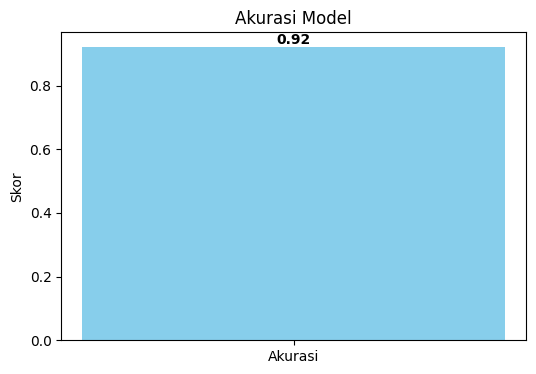

In [53]:
# Data untuk grafik
labels = ['Akurasi']
scores = [accuracy]

   # Buat bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, scores, color=['skyblue'])

   # Tambahkan label dan judul
plt.ylabel('Skor')
plt.title('Akurasi Model')

   # Tampilkan nilai akurasi di atas bar
for i, v in enumerate(scores):
       plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')

   # Tampilkan grafik
plt.show()

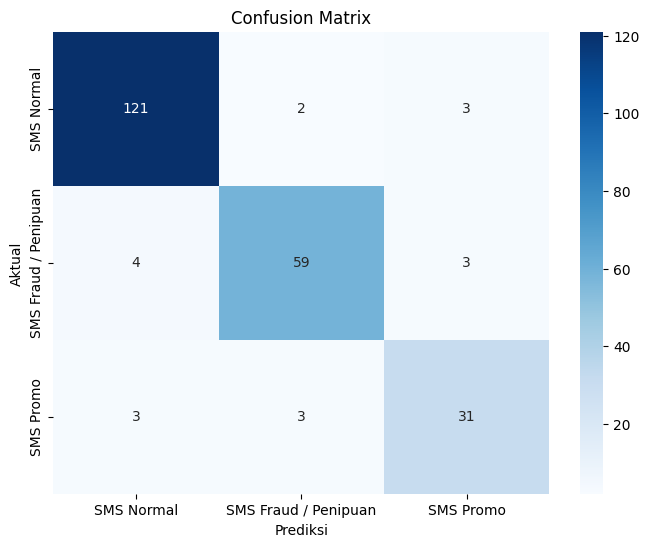

In [54]:
def tampilkan_confusion_matrix(y_test, predicted):

    CM = confusion_matrix(y_test, predicted)

    plt.figure(figsize=(8, 6))
    sns.heatmap(CM, annot=True, fmt="d", cmap="Blues",
                xticklabels=['SMS Normal', 'SMS Fraud / Penipuan', 'SMS Promo'],
                yticklabels=['SMS Normal', 'SMS Fraud / Penipuan', 'SMS Promo'])
    plt.title("Confusion Matrix")
    plt.xlabel("Prediksi")
    plt.ylabel("Aktual")
    plt.show()

tampilkan_confusion_matrix(y_test, predicted)

In [55]:
# menyimpan model
pickle.dump(model,open("model_fraud.sav","wb"))

In [56]:
import os
print(os.getcwd()) #

/content


In [57]:
import os
os.listdir('/content') # m

['.config',
 'feature_TF_IDF.sav',
 'drive',
 'model_fraud.sav',
 'new_selected_feature_tf_idf.sav',
 'img',
 'sample_data']

In [58]:
from google.colab import files

files.download('model_fraud.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
from google.colab import files

files.download('feature_TF_IDF.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
from google.colab import files

files.download('new_selected_feature_tf_idf.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Highest word frequencies in each class

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.feature_extraction.text import CountVectorizer

# cv = CountVectorizer()
# words_count_matrix = cv.fit_transform(data['teks'])
# count_vect = pd.SparseDataFrame(words_count_matrix, columns=cv.get_feature_names())

In [ ]:
# # membuat model prediksi

# data_input = ("promo beli paket flash my telkomsel app extra kuota lte extra telpon mnthr buru cek tselmemytsel sk")
# data_input = text_prepocessing_process(data_input)

# #load
# # tfidf = TfidfVectorizer # This line is not needed

# loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("new_selected_feature_tf_idf.sav", "rb"))))

# # Convert the sparse matrix to a dense array before prediction
# hasil = model.predict(loaded_vec.fit_transform([data_input]).toarray())

# if(hasil==0):
#   s = "SMS Normal"
# elif(hasil==1):
#   s = "SMS Fraud"
# else:
#   s = "SMS Promo"

# print("Hasil Prediksi : \n", s)

In [ ]:
# # SMS Normal
# normal_words = count_vect[data.label == 0]
# normal_words_count = normal_words.sum()
# indices = np.argsort(normal_words_count)[::-1][:10]
# normal_words_count = normal_words_count[indices]

# plt.figure(figsize=(8,4), dpi=80)
# plt.barh(np.arange(len(normal_words_count)),
#          normal_words_count.values,
#          color='deepskyblue')
# plt.yticks(np.arange(len(normal_words_count)), normal_words_count.keys())
# plt.gca().invert_yaxis()
# plt.xlim(0,150)
# plt.title('Frekuensi Kemuncual Kata pada Label: SMS Normal\n', fontweight='bold')
# plt.xlabel('Frekuensi Kemunculan', fontweight='bold')
# plt.ylabel('Kata', fontweight='bold')
# plt.grid()

# plt.savefig('img/frekuensi_kata_normal.png') # save plot

In [ ]:
# import cv2

# originalImage = cv2.imread('img/cloud.jpg')
# grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
# (thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

# # WordCloud Label SMS Normal
# sms_normal = data[data.label == 0]
# normal_string = []
# for t in sms_normal.teks:
#     normal_string.append(t)
# normal_string = pd.Series(normal_string).str.cat(sep=' ')
# from wordcloud import WordCloud

# wordcloud = WordCloud(width=1600, height=800, margin=10,
#                       background_color='white', colormap='Dark2',
#                       max_font_size=300, min_font_size=25,
#                       mask=cloud_mask, contour_width=5, contour_color='firebrick',
#                       max_words=100).generate(normal_string)
# plt.figure(figsize=(10,8))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

# wordcloud.to_file("img/worcloud_normal.png")

In [ ]:
# # SMS Fraud
# fraud_words = count_vect[data.label == 1]
# fraud_words_count = fraud_words.sum()
# indices = np.argsort(fraud_words_count)[::-1][:10]
# fraud_words_count = fraud_words_count[indices]

# plt.figure(figsize=(8,4), dpi=80)
# plt.barh(np.arange(len(fraud_words_count)),
#          fraud_words_count.values,
#          color='royalblue')
# plt.yticks(np.arange(len(fraud_words_count)), fraud_words_count.keys())
# plt.gca().invert_yaxis()
# plt.xlim(0,150)
# plt.title('Frekuensi Kemuncual Kata pada Label: SMS Fraud\n', fontweight='bold')
# plt.xlabel('Frekuensi Kemunculan', fontweight='bold')
# plt.ylabel('Kata', fontweight='bold')
# plt.grid()

# plt.savefig('img/frekuensi_kata_fraud.png') # save plot

In [ ]:
# # WordCloud Label SMS Fraud / Penipuan
# sms_fraud = data[data.label == 1]
# fraud_string = []
# for t in sms_fraud.teks:
#     fraud_string.append(t)
# fraud_string = pd.Series(fraud_string).str.cat(sep=' ')
# from wordcloud import WordCloud

# wordcloud = WordCloud(width=1600, height=800, margin=10,
#                       background_color='white', colormap='CMRmap',
#                       max_font_size=300, min_font_size=25,
#                       mask=cloud_mask, contour_width=5, contour_color='firebrick',
#                       max_words=100).generate(fraud_string)
# plt.figure(figsize=(10,8))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

# wordcloud.to_file("img/worcloud_fraud.png")

In [ ]:
# # SMS Promo
# promo_words = count_vect[data.label == 2]
# promo_words_count = promo_words.sum()
# indices = np.argsort(promo_words_count)[::-1][:10]
# promo_words_count = promo_words_count[indices]

# plt.figure(figsize=(8,4), dpi=80)
# plt.barh(np.arange(len(promo_words_count)),
#          promo_words_count.values,
#          color='skyblue')
# plt.yticks(np.arange(len(promo_words_count)), promo_words_count.keys())
# plt.gca().invert_yaxis()
# plt.xlim(0,150)
# plt.title('Frekuensi Kemuncual Kata pada Label: SMS Promo\n', fontweight='bold')
# plt.xlabel('Frekuensi Kemunculan', fontweight='bold')
# plt.ylabel('Kata', fontweight='bold')
# plt.grid()

# plt.savefig('img/frekuensi_kata_promo.png') # save plot

In [ ]:
# # WordCloud Label SMS Promo
# sms_promo = data[data.label == 2]
# promo_string = []
# for t in sms_promo.teks:
#     promo_string.append(t)
# promo_string = pd.Series(promo_string).str.cat(sep=' ')
# from wordcloud import WordCloud

# wordcloud = WordCloud(width=1600, height=800, margin=10,
#                       background_color='white', colormap='Paired',
#                       max_font_size=300, min_font_size=25,
#                       mask=cloud_mask, contour_width=5, contour_color='firebrick',
#                       max_words=100).generate(promo_string)
# plt.figure(figsize=(10,8))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

# wordcloud.to_file("img/worcloud_promo.png")

# Get the most and least frequent words

In [ ]:
# all_word_count = count_vect[data.label < 3].sum()
# indices = np.argsort(all_word_count)[::-1][:50]
# all_word_count = all_word_count[indices]

# plt.figure(figsize=(10, 20))
# plt.barh(np.arange(len(all_word_count)), all_word_count.values, align='edge', height=0.8)
# plt.yticks(np.arange(len(all_word_count)) + 0.4, all_word_count.keys())
# plt.gca().invert_yaxis()
# plt.title('top 50 most frequent words')
# plt.show()

In [ ]:
# all_word_count = count_vect[data.label < 3].sum()
# indices = np.argsort(all_word_count)[:50]
# all_word_count = all_word_count[indices]

# plt.figure(figsize=(10, 20))
# plt.xlim(0,1.5)
# plt.barh(np.arange(len(all_word_count)), all_word_count.values, align='edge', height=0.8)
# plt.yticks(np.arange(len(all_word_count)) + 0.4, all_word_count.keys())
# plt.gca().invert_yaxis()
# plt.title('top 100 least frequent words')
# plt.show()

In [ ]:
# all_word_count = count_vect[data.label < 3].sum()

In [ ]:
# too_common_words = list(filter(lambda w: all_word_count[w] > 1000, all_word_count.keys()))
# common_words = list(filter(lambda w: all_word_count[w] > 75, all_word_count.keys()))
# too_rare_words = list(filter(lambda w: all_word_count[w] < 20, all_word_count.keys()))

In [ ]:
# len(common_words)

In [ ]:
# len(too_rare_words)

In [ ]:
# len(all_word_count.keys())

# Feature Extraction

In [ ]:
# from sklearn.model_selection import train_test_split

# X = data['teks']
# y = data['label']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

## Bag of Words

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

# cv = CountVectorizer()
# X_train_cv = cv.fit_transform(X_train)
# X_train_cv.shape

## TF-IDF

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfVectorizer()
# X_train_tfidf = tfidf.fit_transform(X_train)
# X_train_tfidf.shape

## Bag of Words & TF-IDF

In [ ]:
# from scipy.sparse.csr import csr_matrix

In [ ]:
# transform_to_tfidf_cv_dataset = lambda tf, cv: csr_matrix(list(map(lambda i: [*tf[i].toarray()[0], *cv[i].toarray()[0]], [i for i in range(tf.shape[0])])))

In [ ]:
# X_train_tfidf_cv = transform_to_tfidf_cv_dataset(X_train_tfidf, X_train_cv)

In [ ]:
# X_train_tfidf_cv

## Word Embedding: Word2Vec

In [ ]:
# import gensim
# from functools import reduce

In [ ]:
# EMBEDDING_SIZE = 10

In [ ]:
# model = gensim.models.Word2Vec(list(map(lambda s: s.split(), X)), min_count=1,  size=EMBEDDING_SIZE)

In [ ]:
# model.wv.most_similar('promo')

In [ ]:
# sentence_embedding = lambda s: reduce(
#         lambda v1, v2: v1 + v2,
#         list(
#             map(
#                 model.wv.get_vector,
#                 [w for w in set(s.split()) if w not in too_common_words and w not in too_rare_words]
#             )
#         ),
#         np.zeros(EMBEDDING_SIZE)
#     )

In [ ]:
# transform_to_embedding_dataset = lambda dataset: np.array(list(map(sentence_embedding, dataset)))

In [ ]:
# X_train_embedding = transform_to_embedding_dataset(X_train)

# Word Embedding combined with others

In [ ]:
# FW_EMBEDDING_SIZE = 100
# CONTEXT_WINDOW = 3

In [ ]:
# fw_model = gensim.models.Word2Vec(list(map(lambda s: s.split(), X)), min_count=1, window=CONTEXT_WINDOW, size=FW_EMBEDDING_SIZE)

In [ ]:
# def fw_sentence_embedding(s):
#     current = np.zeros(FW_EMBEDDING_SIZE)
#     words = s.split()
#     fw = [w for w in words if w in too_common_words][:3]
#     fw = [*fw, *[w for w in words if w in common_words]][:3]
#     if len(fw) > 0:
#         for target in fw:
#             t = words.index(target)
#             for i in range(1, CONTEXT_WINDOW+1):
#                 if t-i < 0:
#                     break
#                 current += fw_model.wv.get_vector(words[t-i])
#             for i in range(1, CONTEXT_WINDOW+1):
#                 if t+i >= len(words):
#                     break
#                 current += fw_model.wv.get_vector(words[t+i])
#     return current

In [ ]:
# transform_to_fw_embedding_dataset = lambda dataset: np.array(list(map(fw_sentence_embedding, dataset)))

In [ ]:
# X_train_fw_embedding = transform_to_fw_embedding_dataset(X_train)

In [ ]:
# transform_to_embedding_cv_dataset = lambda embedding, cv: csr_matrix(list(map(lambda i: [*embedding[i], *cv[i].toarray()[0]], [i for i in range(len(embedding))])))

In [ ]:
# transform_to_embedding_tfidf_dataset = transform_to_embedding_cv_dataset

In [ ]:
# transform_to_embedding_tfidf_cv_dataset = lambda embedding, tfidf, cv: csr_matrix(list(map(lambda i: [*embedding[i], *tfidf[i].toarray()[0], *cv[i].toarray()[0]], [i for i in range(len(embedding))])))

In [ ]:
# X_train_embedding_cv = transform_to_embedding_cv_dataset(X_train_fw_embedding, X_train_cv)

In [ ]:
# X_train_embedding_tfidf = transform_to_embedding_tfidf_dataset(X_train_fw_embedding, X_train_tfidf)

In [ ]:
# X_train_embedding_tfidf_cv = transform_to_embedding_tfidf_cv_dataset(X_train_fw_embedding, X_train_tfidf, X_train_cv)

# Model Evaluation

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn.model_selection import GridSearchCV

In [ ]:
# def print_report(report):
#     print('\t\t\tPrecision\tRecall\t\tF1-Score')
#     print('SMS Normal\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}'.format(report['SMS Normal']['precision'], report['SMS Normal']['recall'], report['SMS Normal']['f1-score']))
#     print('SMS Fraud / Penipuan\t{:.4f}\t\t{:.4f}\t\t{:.4f}'.format(report['SMS Fraud / Penipuan']['precision'], report['SMS Fraud / Penipuan']['recall'], report['SMS Fraud / Penipuan']['f1-score']))
#     print('SMS Promo\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}'.format(report['SMS Promo']['precision'], report['SMS Promo']['recall'], report['SMS Promo']['f1-score']))
#     print('Weighted Average:\t{:.4f}\t\t{:.4f}\t\t{:.4f}'.format(
#         ((report['SMS Normal']['precision'] * report['SMS Normal']['support']) + (report['SMS Fraud / Penipuan']['precision'] * report['SMS Fraud / Penipuan']['support']) + (report['SMS Promo']['precision'] * report['SMS Promo']['support']))/(report['SMS Normal']['support'] + report['SMS Fraud / Penipuan']['support'] + report['SMS Promo']['support']),
#         ((report['SMS Normal']['recall'] * report['SMS Normal']['support']) + (report['SMS Fraud / Penipuan']['recall'] * report['SMS Fraud / Penipuan']['support']) + (report['SMS Promo']['recall'] * report['SMS Promo']['support']))/(report['SMS Normal']['support'] + report['SMS Fraud / Penipuan']['support'] + report['SMS Promo']['support']),
#         ((report['SMS Normal']['f1-score'] * report['SMS Normal']['support']) + (report['SMS Fraud / Penipuan']['f1-score'] * report['SMS Fraud / Penipuan']['support']) + (report['SMS Promo']['f1-score'] * report['SMS Promo']['support']))/(report['SMS Normal']['support'] + report['SMS Fraud / Penipuan']['support'] + report['SMS Promo']['support']),
#     ))
#     print('-----------------------------------------------------------------')

In [ ]:
# def print_param(param):
#     print('Best parameters\n')
#     for p in param:
#         print(p, ':', param[p])
#     print('=================================================================\n\n')

In [ ]:
# from timeit import default_timer as timer

# def evaluate_cv(clf, name, param):
#     t1 = timer()
#     clf = GridSearchCV(clf, param, cv=5, n_jobs=7)
#     clf.fit(X_train_cv, y_train)
#     print('=================================================================')
#     print(name, 'with Bag of Words\n')
#     print_report(classification_report(y_test,
#                                        clf.predict(cv.transform(X_test)),
#                                        target_names=['SMS Normal', 'SMS Fraud / Penipuan', 'SMS Promo'],
#                                        output_dict=True))
#     print('Elapsed time:', timer() - t1, 'seconds')
#     print('-----------------------------------------------------------------')
#     print_param(clf.best_params_)

In [ ]:
# def evaluate_tfidf(clf, name, param):
#     t1 = timer()
#     clf = GridSearchCV(clf, param, cv=5, n_jobs=7)
#     clf.fit(X_train_tfidf, y_train)
#     print('=================================================================')
#     print(name, 'with TF-IDF\n')
#     print_report(classification_report(y_test,
#                                        clf.predict(tfidf.transform(X_test)),
#                                        target_names=['SMS Normal', 'SMS Fraud / Penipuan', 'SMS Promo'],
#                                        output_dict=True))
#     print('Elapsed time:', timer() - t1, 'seconds')
#     print('-----------------------------------------------------------------')
#     print_param(clf.best_params_)

In [ ]:
# def evaluate_word_embedding(clf, name, param):
#     t1 = timer()
#     clf = GridSearchCV(clf, param, cv=5, n_jobs=7)
#     clf.fit(X_train_embedding, y_train)
#     print('=================================================================')
#     print(name, 'with Word Embedding\n')
#     print_report(classification_report(y_test,
#                                        clf.predict(transform_to_embedding_dataset(X_test)),
#                                        target_names=['SMS Normal', 'SMS Fraud / Penipuan', 'SMS Promo'],
#                                        output_dict=True))
#     print('Elapsed time:', timer() - t1, 'seconds')
#     print('-----------------------------------------------------------------')
#     print_param(clf.best_params_)

In [ ]:
# def evaluate_word_embedding_cv(clf, name, param):
#     t1 = timer()
#     clf = GridSearchCV(clf, param, cv=5, n_jobs=7)
#     clf.fit(X_train_embedding_cv, y_train)
#     print('=================================================================')
#     print(name, 'with Word Embedding and Bag of Words\n')
#     print_report(classification_report(
#         y_test,
#         clf.predict(
#             transform_to_embedding_cv_dataset(
#                 transform_to_fw_embedding_dataset(X_test),
#                 cv.transform(X_test)
#             )
#         ),
#         target_names=['SMS Normal', 'SMS Fraud / Penipuan', 'SMS Promo'],
#         output_dict=True
#     ))
#     print('Elapsed time:', timer() - t1, 'seconds')
#     print('-----------------------------------------------------------------')
#     print_param(clf.best_params_)

In [ ]:
# def evaluate_word_embedding_tfidf(clf, name, param):
#     t1 = timer()
#     clf = GridSearchCV(clf, param, cv=5, n_jobs=7)
#     clf.fit(X_train_embedding_tfidf, y_train)
#     print('=================================================================')
#     print(name, 'with Word Embedding and TF-IDF\n')
#     print_report(classification_report(
#         y_test,
#         clf.predict(
#             transform_to_embedding_tfidf_dataset(
#                 transform_to_fw_embedding_dataset(X_test),
#                 tfidf.transform(X_test)
#             )
#         ),
#         target_names=['SMS Normal', 'SMS Fraud / Penipuan', 'SMS Promo'],
#         output_dict=True
#     ))
#     print('Elapsed time:', timer() - t1, 'seconds')
#     print('-----------------------------------------------------------------')
#     print_param(clf.best_params_)

In [ ]:
# def evaluate_tfidf_cv(clf, name, param):
#     t1 = timer()
#     clf = GridSearchCV(clf, param, cv=5, n_jobs=7)
#     clf.fit(X_train_tfidf_cv, y_train)
#     print('=================================================================')
#     print(name, 'with TF-IDF and Bag of Words\n')
#     print_report(
#         classification_report(
#             y_test,
#             clf.predict(
#                 transform_to_tfidf_cv_dataset(
#                     tfidf.transform(X_test),
#                     cv.transform(X_test)
#                 )
#             ),
#             target_names=['SMS Normal', 'SMS Fraud / Penipuan', 'SMS Promo'],
#             output_dict=True
#         )
#     )
#     print('Elapsed time:', timer() - t1, 'seconds')
#     print('-----------------------------------------------------------------')
#     print_param(clf.best_params_)

In [ ]:
# def evaluate_word_embedding_tfidf_cv(clf, name, param):
#     t1 = timer()
#     clf = GridSearchCV(clf, param, cv=5, n_jobs=7)
#     clf.fit(X_train_embedding_tfidf_cv, y_train)
#     print('=================================================================')
#     print(name, 'with Word Embedding, TF-IDF, and Bag of Words\n')
#     print_report(classification_report(
#         y_test,
#         clf.predict(
#             transform_to_embedding_tfidf_cv_dataset(
#                 transform_to_fw_embedding_dataset(X_test),
#                 tfidf.transform(X_test),
#                 cv.transform(X_test)
#             )
#         ),
#         target_names=['SMS Normal', 'SMS Fraud / Penipuan', 'SMS Promo'],
#         output_dict=True
#     ))
#     print('Elapsed time:', timer() - t1, 'seconds')
#     print('-----------------------------------------------------------------')
#     print_param(clf.best_params_)

In [ ]:
# def evaluate(clf, name, param):
#     evaluate_cv(clf, name, param)
#     evaluate_tfidf(clf, name, param)
#     evaluate_tfidf_cv(clf, name, param)
#     evaluate_word_embedding(clf, name, param)
#     evaluate_word_embedding_cv(clf, name, param)
#     evaluate_word_embedding_tfidf(clf, name, param)
#     evaluate_word_embedding_tfidf_cv(clf, name, param)

In [ ]:
# from sklearn.naive_bayes import MultinomialNB

# clf = MultinomialNB().fit(X_train_cv, y_train)
# print('Multinomial Naive Bayes with count vectorizer\n', classification_report(y_test,
#                                                                                 clf.predict(cv.transform(X_test)),
#                                                                                 target_names=['SMS Normal', 'SMS Fraud / Penipuan', 'SMS Promo']))

# clf = MultinomialNB().fit(X_train_tfidf, y_train)
# print('Multinomial Naive Bayes with tfidf\n', classification_report(y_test,
#                                                                      clf.predict(tfidf.transform(X_test)),
#                                                                      target_names=['SMS Normal', 'SMS Fraud / Penipuan', 'SMS Promo']))

In [ ]:
# from sklearn.linear_model import LogisticRegression
# Linear = evaluate(LogisticRegression(), 'Logistic Regression', {'solver':['newton-cg', 'lbfgs'], 'max_iter':[100, 1000]})